# ATP Tennis Data - Player Diff Stats


In previous notebooks, we ran our models with encoded categories but we left player stats as is. In this notebook, we created an alternate dataset where player stats are diff'd - ie, p1_ht_diff = p1_ht - p2_ht. Non-ordinal categorical features are not yet one hot encoded in this notebook.

The following columns were created:
* p1_ht_diff
* p1_rank_diff
* p1_seed_diff
* p1_age_diff


I'm hoping that by establishing relationships between features, this will provide our models with more information to better predict results


# Best Results from our last notebook (Gradient Boosting)
```
Model Score: 0.6826468602295747

ROC/AUC Score: 0.682614201415636
              precision    recall  f1-score   support

        Loss       0.68      0.67      0.68      7381
         Win       0.68      0.69      0.69      7429

    accuracy                           0.68     14810
   macro avg       0.68      0.68      0.68     14810
weighted avg       0.68      0.68      0.68     14810
```

# Summary of Results

```
Model Score: 0.6609723160027009

ROC/AUC Score: 0.6609702865854745
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810
```



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.decomposition import PCA
from datetime import datetime
import pickle
import json
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from util import jupyter_util as ju
from util.model_util import ModelWrapper, LABEL_COL, RSTATE, N_JOBS, MAX_ITER

%matplotlib inline
sns.set()


# date
DATE_FORMAT = '%Y-%m-%d %H:%m'
DATE = datetime.now().strftime(DATE_FORMAT)

DESCRIPTION = "diff"

# sometimes I run these notebooks via command line. Environment variable is set so we know whether we are in DEBUG mode or not
# if you want to manually run this in DEBUG mode, change default value to True
DEBUG = bool(os.environ.get("IPYNB_DEBUG", False))

if DEBUG:
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features_test-diff.csv'
    ModelWrapper.REPORT_FILE = '../reports/summary-test.csv'
    DESCRIPTION = f"{DESCRIPTION}-test"
else:
    FEATURE_FILE = f'../datasets/atp_matches_1985-2019_features-diff.csv'



START_YEAR = 1998
END_YEAR = 2018



In [2]:
X_train, X_test, y_train, y_test = ju.get_data(FEATURE_FILE, LABEL_COL, START_YEAR, END_YEAR)

# Logistic Regression

In [3]:

# train our model

lr = ModelWrapper(LogisticRegression(n_jobs = N_JOBS, verbose = 1, random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_lr = lr.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:1544: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


[LibLinear]

Model Score: 0.6554355165428765

ROC/AUC Score: 0.6554408696779224
              precision    recall  f1-score   support

        Loss       0.65      0.66      0.66      7381
         Win       0.66      0.65      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4850  2531
Win   2572  4857


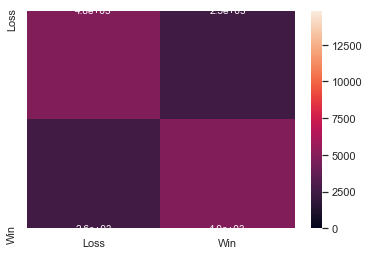

In [4]:
lr.analyze()

In [5]:
# ju.plot_2d(X_test, y_predict_lr)

In [6]:
lr.save()

Saving report: ../reports/summary.csv


# KNN

In [7]:

# train our model

knn = ModelWrapper(KNeighborsClassifier(n_jobs = N_JOBS),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_knn = knn.predict()

Model Score: 0.5983794733288319

ROC/AUC Score: 0.5983651876430388
              precision    recall  f1-score   support

        Loss       0.60      0.59      0.60      7381
         Win       0.60      0.60      0.60      7429

    accuracy                           0.60     14810
   macro avg       0.60      0.60      0.60     14810
weighted avg       0.60      0.60      0.60     14810

      Loss   Win
Loss  4384  2997
Win   2951  4478


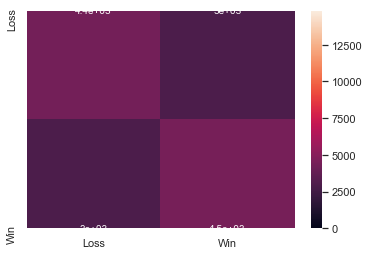

In [8]:
knn.analyze()

In [9]:
# ju.plot_2d(X_test, y_predict_knn)

In [10]:
knn.save()

Saving report: ../reports/summary.csv


# Decision Tree

In [11]:

# train our model

dt = ModelWrapper(DecisionTreeClassifier(random_state = RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_dt = dt.predict()

Model Score: 0.5637407157326131

ROC/AUC Score: 0.5637346011191089
              precision    recall  f1-score   support

        Loss       0.56      0.56      0.56      7381
         Win       0.57      0.57      0.57      7429

    accuracy                           0.56     14810
   macro avg       0.56      0.56      0.56     14810
weighted avg       0.56      0.56      0.56     14810

      Loss   Win
Loss  4147  3234
Win   3227  4202


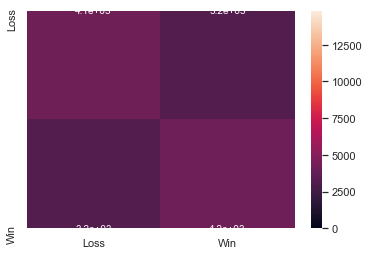

In [12]:
dt.analyze()

In [13]:
# ju.plot_2d(X_test, y_predict_dt)

In [14]:
dt.save()

Saving report: ../reports/summary.csv


# Random Forest Classifier

In [15]:

# train our model

rf = ModelWrapper(RandomForestClassifier(random_state=RSTATE, verbose=1),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_rf = rf.predict()

/Users/vinceluk/anaconda3/envs/capstone2/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


Model Score: 0.6198514517218096

ROC/AUC Score: 0.6200960658155937
              precision    recall  f1-score   support

        Loss       0.60      0.70      0.65      7381
         Win       0.64      0.54      0.59      7429

    accuracy                           0.62     14810
   macro avg       0.62      0.62      0.62     14810
weighted avg       0.62      0.62      0.62     14810

      Loss   Win
Loss  5134  2247
Win   3383  4046


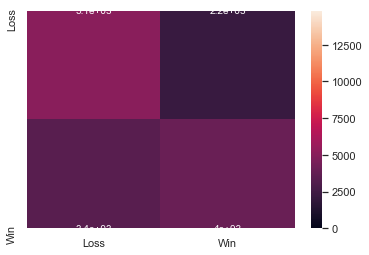

In [16]:
rf.analyze()

In [17]:
# ju.plot_2d(X_test, y_predict_rf)

In [18]:
rf.save()

Saving report: ../reports/summary.csv


# Gradient Boosting

In [19]:

# train our model

gb = ModelWrapper(GradientBoostingClassifier(random_state=RSTATE, verbose=1, n_iter_no_change = 4),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_gb = gb.predict()

      Iter       Train Loss   Remaining Time 
         1           1.3644            3.67s
         2           1.3467            3.58s
         3           1.3321            3.46s
         4           1.3201            3.48s
         5           1.3101            3.56s
         6           1.3017            3.50s
         7           1.2948            3.48s
         8           1.2890            3.48s
         9           1.2841            3.45s
        10           1.2800            3.47s
        20           1.2591            2.95s
        30           1.2507            2.47s
        40           1.2458            2.08s
        50           1.2417            1.69s
        60           1.2392            1.30s
        70           1.2364            0.96s
        80           1.2339            0.64s
        90           1.2317            0.32s
       100           1.2296            0.00s


Model Score: 0.6609723160027009

ROC/AUC Score: 0.6609702865854745
              precision    recall  f1-score   support

        Loss       0.66      0.66      0.66      7381
         Win       0.66      0.66      0.66      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4874  2507
Win   2514  4915


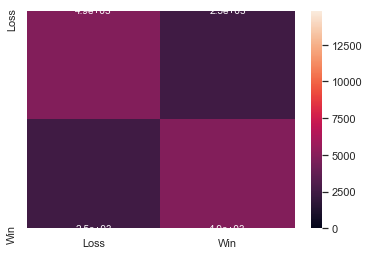

In [20]:
gb.analyze()

In [21]:
# ju.plot_2d(X_test, y_predict_gb)

In [22]:
gb.save()

Saving report: ../reports/summary.csv


# AdaBoost

In [23]:
ab = ModelWrapper(AdaBoostClassifier(random_state=RSTATE),
                  description = DESCRIPTION, 
                 data_file = FEATURE_FILE,
                  start_year = START_YEAR,
                  end_year = END_YEAR,
                   X_train = X_train,
                   y_train = y_train,
                   X_test = X_test,
                   y_test = y_test).fit()
y_predict_ab = ab.predict()

Model Score: 0.6588116137744767

ROC/AUC Score: 0.6588629597237263
              precision    recall  f1-score   support

        Loss       0.65      0.67      0.66      7381
         Win       0.67      0.64      0.65      7429

    accuracy                           0.66     14810
   macro avg       0.66      0.66      0.66     14810
weighted avg       0.66      0.66      0.66     14810

      Loss   Win
Loss  4980  2401
Win   2652  4777


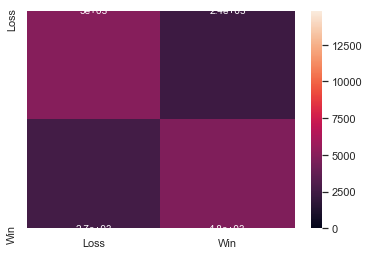

In [24]:
ab.analyze()

In [25]:
# ju.plot_2d(X_test, y_predict_ab)

In [26]:
ab.save()

Saving report: ../reports/summary.csv


# Summary

Decision Tree Classifier did the best with a 92% accuracy score while KNN did the worst at about 60% (below our null hypothesis)

In [30]:
report = pd.read_csv(ModelWrapper.REPORT_FILE)
report[report.description == DESCRIPTION]

,model_name,description,data_file,start_year,end_year,accuracy,roc_auc_score,confusion_matrix,classification_report,model_file,predict_time_min,fit_time_min,total_time_min
6,LogisticRegression,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.655436,0.655441,"{""0"": {""0"": 4850, ""1"": 2572}, ""1"": {""0"": 2531,...","{""Loss"": {""precision"": 0.6534626785233091, ""re...",../models/logisticregression-1998-2018-diff.pkl,0.0,0.0,0.0
7,KNeighborsClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.598379,0.598365,"{""0"": {""0"": 4384, ""1"": 2951}, ""1"": {""0"": 2997,...","{""Loss"": {""precision"": 0.5976823449216088, ""re...",../models/kneighborsclassifier-1998-2018-diff.pkl,0.0,0.0,0.0
8,DecisionTreeClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.563741,0.563735,"{""0"": {""0"": 4147, ""1"": 3227}, ""1"": {""0"": 3234,...","{""Loss"": {""precision"": 0.5623813398426906, ""re...",../models/decisiontreeclassifier-1998-2018-dif...,0.0,0.0,0.0
9,RandomForestClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.619851,0.620096,"{""0"": {""0"": 5134, ""1"": 3383}, ""1"": {""0"": 2247,...","{""Loss"": {""precision"": 0.6027944111776448, ""re...",../models/randomforestclassifier-1998-2018-dif...,0.0,0.0,0.0
10,GradientBoostingClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.660972,0.660970,"{""0"": {""0"": 4874, ""1"": 2514}, ""1"": {""0"": 2507,...","{""Loss"": {""precision"": 0.6597184623714131, ""re...",../models/gradientboostingclassifier-1998-2018...,0.0,0.0,0.0
11,AdaBoostClassifier,diff,../datasets/atp_matches_1985-2019_features-dif...,1998,2018,0.658812,0.658863,"{""0"": {""0"": 4980, ""1"": 2652}, ""1"": {""0"": 2401,...","{""Loss"": {""precision"": 0.6525157232704403, ""re...",../models/adaboostclassifier-1998-2018-diff.pkl,0.0,0.0,0.0


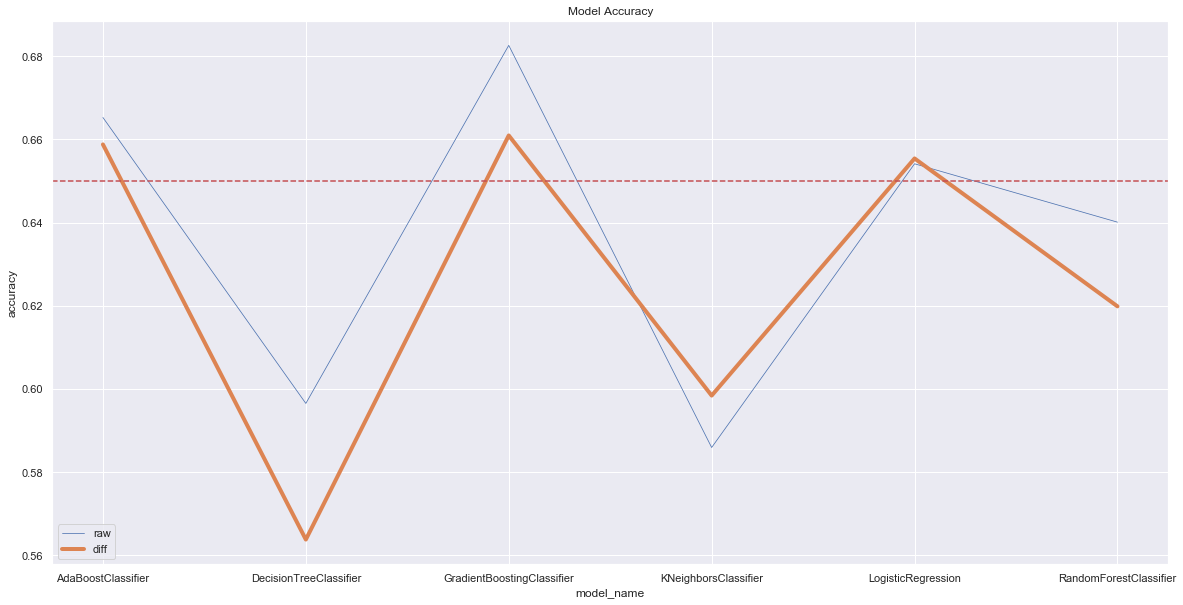

In [31]:
f, a = plt.subplots(1, 1, figsize=(20, 10))

descs = report.description.unique()

for desc in descs:
    report_desc = report[report.description == desc]
    if desc == DESCRIPTION:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=4)
    else:
        sns.lineplot(x="model_name", y="accuracy", data=report_desc, label=desc, linewidth=0.75)

a.axhline(0.65, ls='--', color='r')
a.set_title(f"Model Accuracy")
_ = a.legend(loc="lower left")

In [55]:
best_model = report.loc[report[report.description == DESCRIPTION].accuracy.idxmax()].model_name
print(f'Best Model: {best_model}')
current_report = report[(report.model_name == 'GradientBoostingClassifier') &
                                  (report.description == DESCRIPTION)]
mw = ModelWrapper.get_model_wrapper_from_report(current_report)



Best Model: GradientBoostingClassifier


In [52]:
import shap

shap.initjs()

explainer = shap.TreeExplainer(mw.model, data=X_train.values)
shap_values = explainer.shap_values(X_test.values)

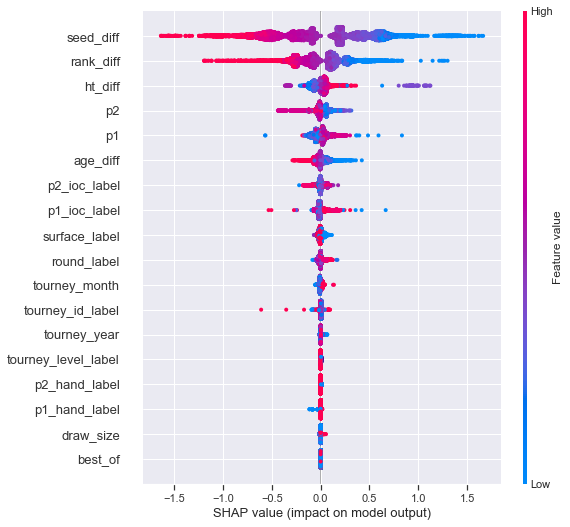

In [53]:
shap.summary_plot(shap_values, X_test, max_display=30)

In [54]:
print(f'Last Finished: {datetime.now().strftime("%Y-%m-%d %H:%M")}')

Last Finished: 2019-10-20 22:34
